In [22]:
from __future__ import division, print_function
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

test_size = 0.3
random_state = 4444

# Challenge 8

## Q1

In [23]:
cols = ['class','handi','water','adopt','phy-fee',
        'elaid','rel','sat-ban','contras','missile',
        'immi', 'synfuel','edspend','supersue',
        'crime','duty','exsa']
df = pd.read_csv('house-votes-84.data', header=0, names = cols )



In [24]:
df = df.replace('y', 1).replace('n', 0)

In [25]:
for col in cols[1:]:
    mean = df[df[col]!='?'][col].mean()
    df[col] = df[col].replace('?', mean)

In [26]:

X = df.iloc[:,1:]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=test_size, random_state = random_state)
y_pred = {}
y_prob = {}

In [27]:
models = ['GaussianNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 
          'LogisticRegression', 'KNeighborsClassifier']

options = ['', '', '', 'n_estimators=1000', 
           'C=1000000', 'n_neighbors=12']

scores = ['accuracy_score', 'precision_score', 
          'recall_score', 'f1_score']

score_list = []

for i, model_name in enumerate(models):
    exec('model = '+ model_name + '('+ options[i] +')')
    model.fit(X_train,y_train)
    y_pred[model_name] = model.predict(X_test)
    try:
        y_prob[model_name] = model.predict_proba(X_test)[:,0]
    except:
        y_prob[model_name] = (y_pred[model_name] == 'democrat')*1
    for score in scores:
        try:
            exec('s = ' + score + 
             "( y_pred[model_name], y_test, pos_label='democrat')")
        except:
            exec('s = ' + score + 
             "( y_pred[model_name], y_test)")
                
        score_list.append([model_name, score, s])
pd.DataFrame(score_list).set_index([0,1])


2
0                      1                        
GaussianNB             accuracy_score   0.908397
                       precision_score  0.949367
                       recall_score     0.903614
                       f1_score         0.925926
SVC                    accuracy_score   0.954198
                       precision_score  0.962025
                       recall_score     0.962025
                       f1_score         0.962025
DecisionTreeClassifier accuracy_score   0.923664
                       precision_score  0.949367
                       recall_score     0.925926
                       f1_score         0.937500
RandomForestClassifier accuracy_score   0.946565
                       precision_score  0.962025
                       recall_score     0.950000
                       f1_score         0.955975
LogisticRegression     accuracy_score   0.954198
                       precision_score  0.974684
                       recall_score     0.950617
                       f1_score         0.962500
KNeighborsClassifier   accuracy_score   0.931298
                       precision_score  0.949367
                       recall_score     0.937500
                       f1_score         0.943396

## Q2

GaussianNB AUC 0.942307692308
SVC AUC 0.952166504382
DecisionTreeClassifier AUC 0.916991236611
RandomForestClassifier AUC 0.989532619279
LogisticRegression AUC 0.990019474197
KNeighborsClassifier AUC 0.952166504382


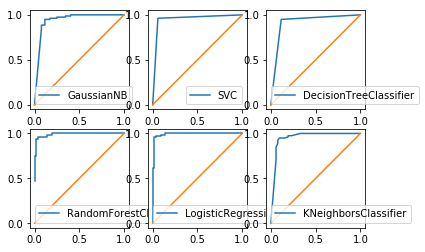

In [28]:
y_bin = (y_test == 'democrat')*1

for i, model in enumerate(models):
    plt.subplot(2,3,i+1)
    fpr, tpr, thresholds = roc_curve(y_bin, y_prob[model])
    print(model,'AUC', roc_auc_score(y_bin, y_prob[model]))
    plt.plot(fpr,tpr, label = model)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.legend()


## Q3

In [8]:
models = ['GaussianNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 
          'LogisticRegression', 'KNeighborsClassifier']

scores = ['accuracy_score', 'precision_score', 
          'recall_score', 'f1_score']

options = ['', '', '', 'n_estimators=1000', 
           'C=1000000', 'n_neighbors=12']


score_list = []

for i, model_name in enumerate(models):
    exec('model = '+ model_name + '('+ options[i] +')')
    model.fit(X_train,y_train)
    y_pred[model_name] = model.predict(X_test)
    for score in scores:
        try:
            exec('scorer = make_scorer(' + score + 
             ", pos_label='democrat')")
            s = np.mean(cross_val_score(model, X, y, scoring= scorer))
        except:
            exec('scorer = make_scorer(' + score + 
             ")")
            s = np.mean(cross_val_score(model, X, y, scoring= scorer))
        
        score_list.append([model_name, score, s])
pd.DataFrame(score_list).set_index([0,1])


2
0                      1                        
GaussianNB             accuracy_score   0.930843
                       precision_score  0.948219
                       recall_score     0.940075
                       f1_score         0.943525
SVC                    accuracy_score   0.953879
                       precision_score  0.977123
                       recall_score     0.947566
                       f1_score         0.961804
DecisionTreeClassifier accuracy_score   0.951533
                       precision_score  0.965940
                       recall_score     0.951311
                       f1_score         0.962004
RandomForestClassifier accuracy_score   0.967704
                       precision_score  0.980970
                       recall_score     0.962547
                       f1_score         0.975365
LogisticRegression     accuracy_score   0.960776
                       precision_score  0.970083
                       recall_score     0.966292
                       f1_score         0.967823
KNeighborsClassifier   accuracy_score   0.926261
                       precision_score  0.957355
                       recall_score     0.921348
                       f1_score         0.938957

## Q4

In [9]:
df = pd.read_csv('2013_movies.csv').dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


In [11]:
cont_var = ['Budget', 'DomesticTotalGross', 'Runtime']

X = df.loc[:,cont_var]
y = df.Rating


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=test_size, random_state = random_state)

In [13]:
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred['knn'] = knn.predict(X_test)

In [14]:
def simple_pg_thir(X):
    return ['PG-13' for i in range(X.shape[0])]
y_pred['simple'] = simple_pg_thir(X_test)

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred['lr'] = lr_model.predict(X_test)

In [16]:
models = ['knn', 'simple', 'lr']
for model in models:
    print(model + ':')
    print(classification_report(y_test, y_pred[model]))

knn:
             precision    recall  f1-score   support

         PG       0.50      0.20      0.29         5
      PG-13       0.50      0.73      0.59        11
          R       0.67      0.55      0.60        11

avg / total       0.57      0.56      0.54        27

simple:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         5
      PG-13       0.41      1.00      0.58        11
          R       0.00      0.00      0.00        11

avg / total       0.17      0.41      0.24        27

lr:
             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         5
      PG-13       0.41      0.82      0.55        11
          R       0.60      0.27      0.37        11

avg / total       0.41      0.44      0.38        27



/Users/mrapp/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Q5

In [17]:
cols = ['age', 'year', 'nodes', 'survive']
df = pd.read_csv('haberman.data',  header=0, names = cols )

In [18]:
feat_cols = ['age', 'year', 'nodes']

X = df.loc[:,feat_cols]
y = df.survive

X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=test_size, random_state = random_state)

lr_model = LogisticRegression(C=100000)


In [19]:
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)
y_prob = lr_model.predict_proba(X_test)[:,0]

Logistic Regression AUC 0.64209199748


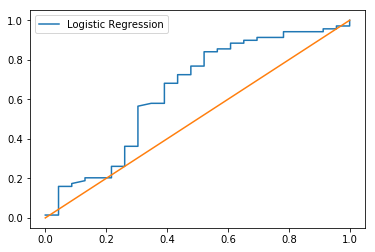

In [21]:
y_bin = (y_test == 1)*1

fpr, tpr, thresholds = roc_curve(y_bin, y_prob)
print('Logistic Regression AUC', roc_auc_score(y_bin, y_prob))
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100));
plt.legend()